# Reconocimiento Dígitos DB MINST con CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importación de los datos

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Exploracion de los datos

In [4]:
print(X_train[0].shape)

(28, 28)


In [5]:
y_train[0]

5

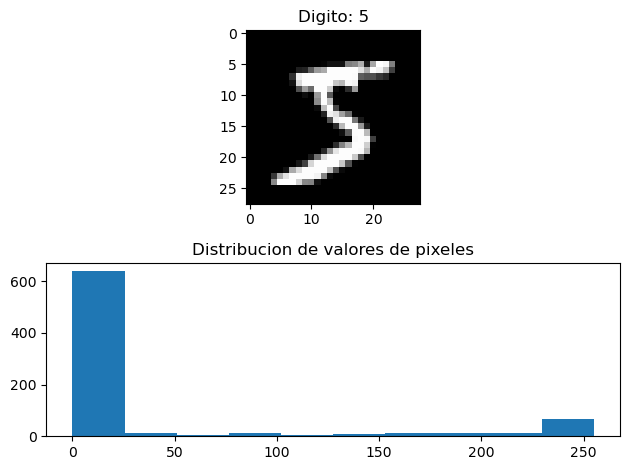

In [6]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digito: {}".format(y_train[0]))
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Distribucion de valores de pixeles")
plt.tight_layout()
plt.show()

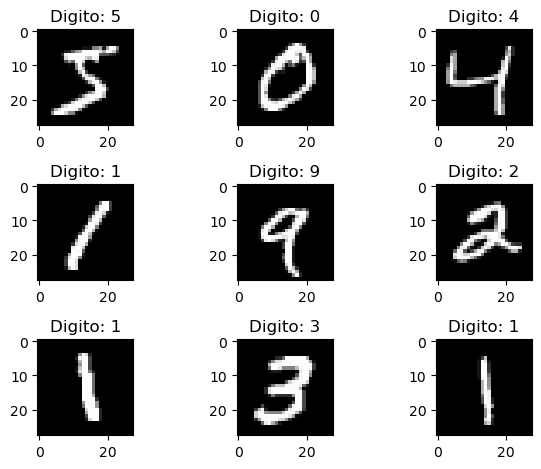

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digito: {}".format(y_train[i]))

#### Preprocesamiento

Primero escalamos los datos, como los valores van de 0 a 255, basta solamente con dividir por 255

In [8]:
X_train = X_train / 255
X_test = X_test / 255

Ahora, lo llevaremos de un shape (60000, 28, 28) lo transformaremos en un shape (60000, 28, 28, 1). Esto, porque así lo requiere keras:

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [11]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Seguimos con la transformación de la respuesta, se debe llevar a un vector

In [13]:
from keras.utils import to_categorical

In [14]:
# vectores de respuesta
# 4 ->  [0,0,0,0,1,0,0,0,0,0]
# 5 ->  [0,0,0,0,0,1,0,0,0,0]
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

#### Diseño de la Arquitectura de la Red

- Input vector: (28,28,1)

- Layer Conv2D: 32 capas con kernel de 3x3 con activacion relu
- Layer MaxPooling: con size de 2x2

- Layer Conv2D: 64 capas con kernel de 3x3 con activacion relu
- Layer MaxPooling: con size de 2x2

- Layer aplanamiento
- Layer Dropout de 0.5
- Layer Denso: con 10 categorías y activacion softmax

In [15]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten

In [16]:
model = Sequential()
model.add( Input(shape=(28,28,1)) )
model.add( Conv2D(32, kernel_size=(3,3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Conv2D(64, kernel_size=(3,3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Flatten() )
model.add( Dropout(0.5) )
model.add( Dense(10, activation='softmax') )

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Entrenamiento del Modelo

In [19]:
model.fit(X_train, Y_train, epochs=20, batch_size=128,
                   verbose=2, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 47s - loss: 0.3425 - accuracy: 0.8952 - val_loss: 0.0813 - val_accuracy: 0.9763 - 47s/epoch - 100ms/step
Epoch 2/20
469/469 - 45s - loss: 0.1051 - accuracy: 0.9681 - val_loss: 0.0542 - val_accuracy: 0.9838 - 45s/epoch - 97ms/step
Epoch 3/20
469/469 - 42s - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0414 - val_accuracy: 0.9866 - 42s/epoch - 89ms/step
Epoch 4/20
469/469 - 41s - loss: 0.0661 - accuracy: 0.9798 - val_loss: 0.0399 - val_accuracy: 0.9866 - 41s/epoch - 87ms/step
Epoch 5/20
469/469 - 44s - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.0358 - val_accuracy: 0.9886 - 44s/epoch - 93ms/step
Epoch 6/20
469/469 - 46s - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0319 - val_accuracy: 0.9890 - 46s/epoch - 98ms/step
Epoch 7/20
469/469 - 44s - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0282 - val_accuracy: 0.9907 - 44s/epoch - 93ms/step
Epoch 8/20
469/469 - 45s - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0286 - val_accuracy: 0.9904 - 45s/epoch - 97ms/step

#### Métricas de Evaluación

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [22]:
y_pred_clases = np.argmax(y_pred, axis=1)

In [23]:
accuracy_score(y_test,y_pred_clases)

0.9921